In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
import itertools
import collections
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
data = json.load(open('new_lotto_data_api.json'))
df = pd.DataFrame(data["items"])


In [4]:
df.columns.unique()
df.info()
flatten = pd.json_normalize(df['results'])
flatten_again = pd.json_normalize(flatten[0])
flaten_more = flatten_again['resultsJson']
flat_list = itertools.chain.from_iterable(flaten_more)
list(flat_list)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7069 entries, 0 to 7068
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   drawSystemId          7069 non-null   int64 
 1   drawDate              7069 non-null   object
 2   gameType              7069 non-null   object
 3   multiplierValue       7069 non-null   int64 
 4   results               7069 non-null   object
 5   showSpecialResults    7069 non-null   bool  
 6   isNewEuroJackpotDraw  7069 non-null   bool  
dtypes: bool(2), int64(2), object(3)
memory usage: 290.1+ KB


[18,
 11,
 30,
 19,
 27,
 39,
 7,
 5,
 42,
 28,
 23,
 20,
 14,
 23,
 16,
 34,
 40,
 18,
 43,
 20,
 13,
 7,
 17,
 35,
 5,
 46,
 40,
 4,
 26,
 1,
 16,
 4,
 17,
 33,
 19,
 41,
 23,
 10,
 36,
 27,
 32,
 11,
 41,
 31,
 2,
 43,
 12,
 39,
 12,
 49,
 16,
 14,
 21,
 8,
 24,
 12,
 4,
 20,
 49,
 23,
 13,
 40,
 22,
 34,
 8,
 47,
 20,
 3,
 22,
 26,
 27,
 1,
 23,
 34,
 7,
 21,
 38,
 9,
 42,
 33,
 13,
 47,
 30,
 48,
 13,
 22,
 12,
 32,
 4,
 14,
 6,
 8,
 17,
 12,
 7,
 21,
 49,
 2,
 47,
 18,
 21,
 20,
 14,
 48,
 3,
 11,
 17,
 30,
 10,
 46,
 49,
 1,
 48,
 40,
 28,
 21,
 43,
 32,
 17,
 41,
 7,
 43,
 42,
 18,
 2,
 34,
 31,
 21,
 24,
 40,
 34,
 1,
 38,
 37,
 6,
 20,
 2,
 48,
 13,
 27,
 23,
 38,
 8,
 44,
 45,
 11,
 38,
 34,
 29,
 35,
 39,
 28,
 33,
 47,
 49,
 42,
 17,
 28,
 8,
 23,
 24,
 13,
 5,
 43,
 30,
 31,
 20,
 35,
 32,
 44,
 39,
 18,
 7,
 33,
 47,
 11,
 17,
 32,
 10,
 25,
 33,
 46,
 7,
 4,
 32,
 9,
 11,
 16,
 33,
 43,
 9,
 38,
 42,
 25,
 7,
 31,
 30,
 46,
 11,
 46,
 2,
 37,
 33,
 18,
 42,
 18,
 49,
 4

In [5]:
lotto_results = df[["results"]].copy()

In [6]:
# lotto_results.head()
df_results = pd.DataFrame(lotto_results["results"])
df_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7069 entries, 0 to 7068
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   results  7069 non-null   object
dtypes: object(1)
memory usage: 55.4+ KB


In [7]:
unpacked_df = df_results.explode('results').reset_index(drop=True)
unpacked_df = unpacked_df.join(pd.json_normalize(unpacked_df.pop('results')))
unpacked_df["resultsJson"] = unpacked_df["resultsJson"].apply(sorted)
# unpacked_df["drawSystemId"] = unpacked_df["drawSystemId"].apply(int)

In [8]:
unpacked_df

,drawDate,drawSystemId,gameType,resultsJson,specialResults
0,2024-07-23T22:00:00Z,7069.0,Lotto,"[11, 18, 19, 27, 30, 39]",[]
1,2024-07-23T22:00:00Z,7069.0,LottoPlus,"[2, 5, 16, 22, 30, 33]",[]
2,2024-07-20T22:00:00Z,7068.0,Lotto,"[5, 7, 20, 23, 28, 42]",[]
3,2024-07-20T22:00:00Z,7068.0,LottoPlus,"[6, 22, 33, 46, 48, 49]",[]
4,2024-07-18T22:00:00Z,7067.0,Lotto,"[14, 16, 18, 23, 34, 40]",[]
...,...,...,...,...,...
9935,1957-02-24T00:00:00Z,5.0,Lotto,"[8, 10, 15, 35, 39, 49]",[]
9936,1957-02-17T00:00:00Z,4.0,Lotto,"[2, 11, 14, 37, 40, 45]",[]
9937,1957-02-10T00:00:00Z,3.0,Lotto,"[18, 19, 20, 26, 45, 49]",[]
9938,1957-02-03T00:00:00Z,2.0,Lotto,"[5, 10, 11, 22, 25, 27]",[]


In [9]:
lotto = unpacked_df.loc[(unpacked_df.gameType == "Lotto") | (unpacked_df.gameType =="LottoPlus")].copy()
lotto["resultsJson"] = lotto["resultsJson"].apply(sorted)
# lotto["drawSystemId"] = lotto["drawSystemId"].apply(int)

In [10]:
start_date = '1994-07-23'
end_date = '2024-07-23'
lotto = lotto[(lotto['drawDate'] >= start_date) & (lotto['drawDate'] <= end_date)]
lotto

,drawDate,drawSystemId,gameType,resultsJson,specialResults
2,2024-07-20T22:00:00Z,7068.0,Lotto,"[5, 7, 20, 23, 28, 42]",[]
3,2024-07-20T22:00:00Z,7068.0,LottoPlus,"[6, 22, 33, 46, 48, 49]",[]
4,2024-07-18T22:00:00Z,7067.0,Lotto,"[14, 16, 18, 23, 34, 40]",[]
5,2024-07-18T22:00:00Z,7067.0,LottoPlus,"[7, 26, 30, 32, 43, 45]",[]
6,2024-07-16T22:00:00Z,7066.0,Lotto,"[7, 13, 17, 20, 35, 43]",[]
...,...,...,...,...,...
6879,1994-08-06T00:00:00Z,3061.0,Lotto,"[10, 12, 14, 15, 24, 34]",[]
6880,1994-08-03T00:00:00Z,3060.0,Lotto,"[7, 9, 10, 12, 15, 44]",[]
6881,1994-07-30T00:00:00Z,3059.0,Lotto,"[1, 5, 18, 21, 30, 39]",[]
6882,1994-07-27T00:00:00Z,3058.0,Lotto,"[1, 4, 8, 9, 34, 41]",[]


FREQUENCY ANALYSIS OF NUMBERS

In [11]:
# Flatten the sets into a single list
all_numbers = [num for subset in lotto["resultsJson"] for num in subset]

# Count frequencies
frequency_counts = collections.Counter(all_numbers)

# Convert the Counter to a DataFrame for better visualization
frequency_df = pd.DataFrame(frequency_counts.items(), columns=['Number', 'Frequency'])

# Sort by frequency
frequency_df = frequency_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

frequency_df
type(frequency_df)

pandas.core.frame.DataFrame

ANALYSIS OF PAIRS OF NUMBERS  IN TERMS OF FREQUENCY

In [12]:
def extract_combinations(data, r):
    combs = []
    for s in data:
        combs.extend(itertools.combinations(s, r))
    return combs

# Extract triplets
pairs = extract_combinations(lotto["resultsJson"], 2)

# Count frequencies
pair_counts = collections.Counter(pairs)

# Convert to DataFrames for better visualization
pair_df = pd.DataFrame(pair_counts.items(), columns=['Pair', 'Frequency'])

# Sort by frequency
pair_df = pair_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)
pair_df

,Pair,Frequency
0,"(10, 44)",105
1,"(21, 39)",102
2,"(13, 22)",101
3,"(7, 46)",99
4,"(16, 38)",99
...,...,...
1171,"(14, 35)",52
1172,"(9, 35)",49
1173,"(5, 22)",49
1174,"(13, 48)",48


ANALYSIS OF TRIPLETS OF NUMBERS IN TERMS OF FREQUENCY

In [13]:
def extract_combinations(data, r):
    combs = []
    for s in data:
        combs.extend(itertools.combinations(s, r))
    return combs

# Extract triplets
triplets = extract_combinations(lotto["resultsJson"], 3)

# Count frequencies
triplet_counts = collections.Counter(triplets)

# Convert to DataFrames for better visualization
triplet_df = pd.DataFrame(triplet_counts.items(), columns=['Triplet', 'Frequency'])

# Sort by frequency
triplet_df = triplet_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)
triplet_df

,Triplet,Frequency
0,"(4, 25, 29)",18
1,"(10, 39, 46)",17
2,"(10, 11, 24)",17
3,"(4, 14, 28)",17
4,"(2, 14, 22)",17
...,...,...
18384,"(10, 31, 36)",1
18385,"(26, 40, 48)",1
18386,"(13, 18, 19)",1
18387,"(5, 16, 39)",1


ANALYSIS OF QUARTET OF NUMBERS IN TERMS OF FREQUENCY

In [14]:
def extract_combinations(data, r):
    combs = []
    for s in data:
        combs.extend(itertools.combinations(s, r))
    return combs

# Extract triplets
quartets = extract_combinations(lotto["resultsJson"], 4)

# Count frequencies
quartet_counts = collections.Counter(quartets)

# Convert to DataFrames for better visualization
quartet_df = pd.DataFrame(quartet_counts.items(), columns=['Triplet', 'Frequency'])

# Sort by frequency
quartet_df = quartet_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)
quartet_df

,Triplet,Frequency
0,"(13, 33, 36, 43)",6
1,"(5, 17, 18, 40)",5
2,"(14, 20, 38, 40)",5
3,"(3, 5, 17, 21)",5
4,"(11, 15, 20, 22)",5
...,...,...
72135,"(12, 36, 41, 44)",1
72136,"(12, 36, 43, 44)",1
72137,"(12, 41, 43, 44)",1
72138,"(34, 36, 41, 44)",1


ANALYSIS OF QUINTET OF NUMBERS IN TERMS OF FREQUENCY

In [15]:
def extract_combinations(data, r):
    combs = []
    for s in data:
        combs.extend(itertools.combinations(s, r))
    return combs

# Extract triplets
quintets = extract_combinations(lotto["resultsJson"], 5)

# Count frequencies
quintet_counts = collections.Counter(quintets)

# Convert to DataFrames for better visualization
quintet_df = pd.DataFrame(quintet_counts.items(), columns=['Quintet', 'Frequency'])

# Sort by frequency
quintet_df = quintet_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)
quintet_df

,Quintet,Frequency
0,"(5, 12, 28, 48, 49)",2
1,"(22, 35, 42, 43, 49)",2
2,"(17, 22, 24, 39, 48)",2
3,"(22, 24, 27, 36, 37)",2
4,"(17, 31, 36, 37, 42)",2
...,...,...
34897,"(3, 6, 18, 22, 43)",1
34898,"(3, 6, 18, 22, 25)",1
34899,"(6, 13, 15, 22, 38)",1
34900,"(4, 13, 15, 22, 38)",1


STATISTICS FOR NUMBER DRAWN

In [16]:
# Expand the DataFrame according to frequencies
freqs = frequency_df['Frequency']

# Calculate statistics
mean = freqs.mean()
median = freqs.median()
mode = freqs.mode()[0] if not freqs.mode().empty else None
std_dev = freqs.std()
range_values = freqs.max() - freqs.min()

# Create a DataFrame to display the results
stats_df = pd.DataFrame({
    'Statistic': ['Mean', 'Median', 'Mode', 'Standard Deviation', 'Range'],
    'Value': [mean, median, mode, std_dev, range_values]
})

print(stats_df)

            Statistic       Value
0                Mean  718.408163
1              Median  721.000000
2                Mode  732.000000
3  Standard Deviation   26.071950
4               Range  128.000000


In [17]:
# Convert drawDate to datetime
lotto['drawDate'] = pd.to_datetime(lotto['drawDate'])

# Function to calculate hot and cold numbers within a specified date range
def calculate_hot_cold_numbers(start_date, end_date):
    # Filter data within the specified date range
    filtered_data = lotto[(lotto['drawDate'] >= start_date) & (lotto['drawDate'] <= end_date)]
    
    # Flatten the list of results into a single list of numbers
    all_numbers = list(itertools.chain.from_iterable(filtered_data['resultsJson']))
    
    # Count frequencies of each number
    frequency_counts = collections.Counter(all_numbers)
    
    # Convert the Counter to a DataFrame for better visualization
    frequency_df = pd.DataFrame(frequency_counts.items(), columns=['Number', 'Frequency'])
    
    # Sort by frequency
    sorted_frequency_df = frequency_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)
    
    # Hot numbers (most frequent)
    hot_numbers = sorted_frequency_df.head()
    
    # Cold numbers (least frequent)
    cold_numbers = sorted_frequency_df.tail()
    
    return hot_numbers, cold_numbers

In [18]:
hot, cold = calculate_hot_cold_numbers('1995-07-23', '2024-07-23')

In [19]:
hot

,Number,Frequency
0,17,766
1,38,752
2,21,749
3,34,735
4,4,733


In [20]:
cold

,Number,Frequency
44,43,676
45,31,668
46,48,657
47,5,654
48,33,639


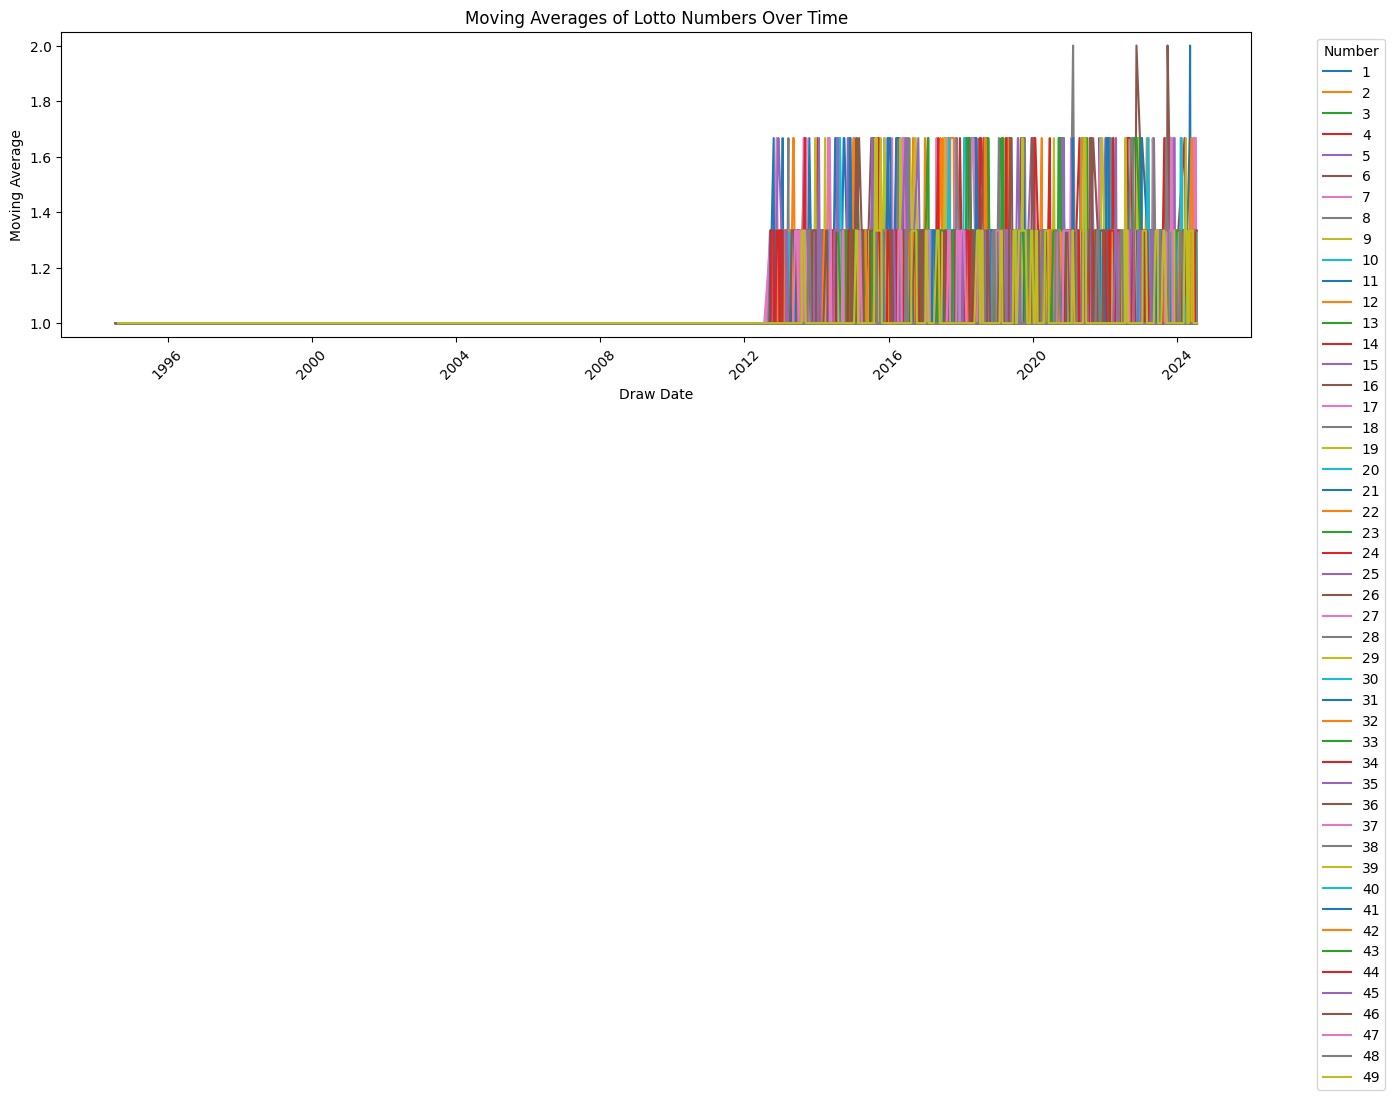

In [21]:

# Convert drawDate to datetime
lotto['drawDate'] = pd.to_datetime(lotto['drawDate'])

# Expand the resultsJson into a long format DataFrame
expanded_data = lotto.explode('resultsJson').reset_index(drop=True)
expanded_data = expanded_data.rename(columns={'resultsJson': 'Number'})

# Define the window size for the moving average
window_size = 3

# Calculate the moving average for each number
expanded_data['Count'] = 1
expanded_data = expanded_data.groupby(['Number', 'drawDate']).count().reset_index()
expanded_data['Moving_Avg'] = expanded_data.groupby('Number')['Count'].transform(lambda x: x.rolling(window=window_size, min_periods=1).mean())

# Plotting the moving averages using seaborn and matplotlib
plt.figure(figsize=(14, 8))
sns.lineplot(data=expanded_data, x='drawDate', y='Moving_Avg', hue='Number', palette='tab10')
plt.title('Moving Averages of Lotto Numbers Over Time')
plt.xlabel('Draw Date')
plt.ylabel('Moving Average')
plt.legend(title='Number', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

Even/Odd Distribution: Analyze the distribution of even and odd numbers in each draw.

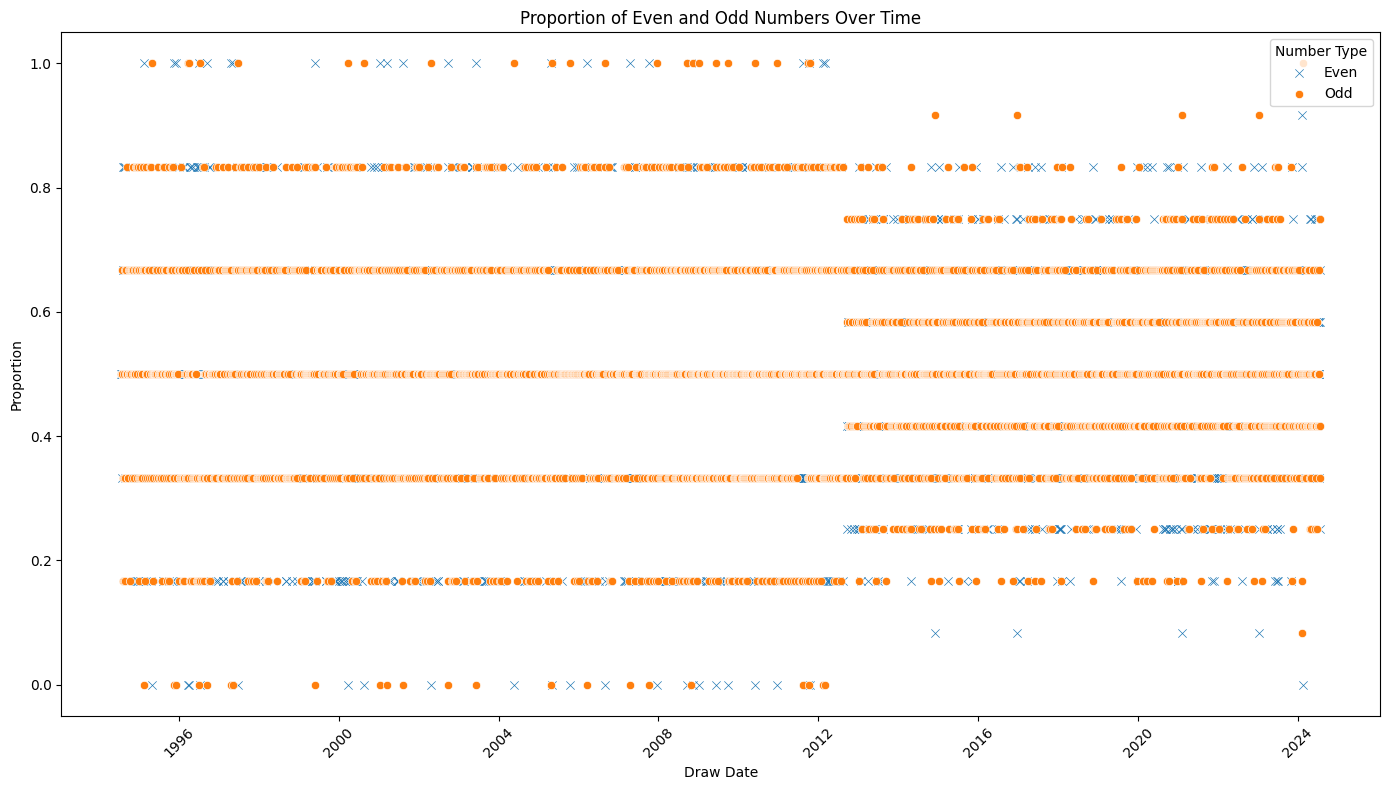

In [22]:
# Expand the resultsJson into a long format DataFrame
expanded_data = lotto.explode('resultsJson').reset_index(drop=True)
expanded_data = expanded_data.rename(columns={'resultsJson': 'Number'})

# Identify each number as even or odd
expanded_data['EvenOdd'] = expanded_data['Number'].apply(lambda x: 'Even' if x % 2 == 0 else 'Odd')

# Calculate the proportion of even and odd numbers for each draw
even_odd_distribution = expanded_data.groupby(['drawDate', 'EvenOdd']).size().unstack(fill_value=0)
even_odd_distribution['Total'] = even_odd_distribution.sum(axis=1)
even_odd_distribution['EvenProportion'] = even_odd_distribution['Even'] / even_odd_distribution['Total']
even_odd_distribution['OddProportion'] = even_odd_distribution['Odd'] / even_odd_distribution['Total']

# Reset index for plotting
even_odd_distribution = even_odd_distribution.reset_index()

# Plotting the even and odd distribution using seaborn and matplotlib
plt.figure(figsize=(14, 8))
sns.scatterplot(data=even_odd_distribution, x='drawDate', y='EvenProportion', label='Even', marker='x')
sns.scatterplot(data=even_odd_distribution, x='drawDate', y='OddProportion', label='Odd', marker='o')
plt.title('Proportion of Even and Odd Numbers Over Time')
plt.xlabel('Draw Date')
plt.ylabel('Proportion')
plt.legend(title='Number Type')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

It's not clear let's seperate graphs for even and odd numbers

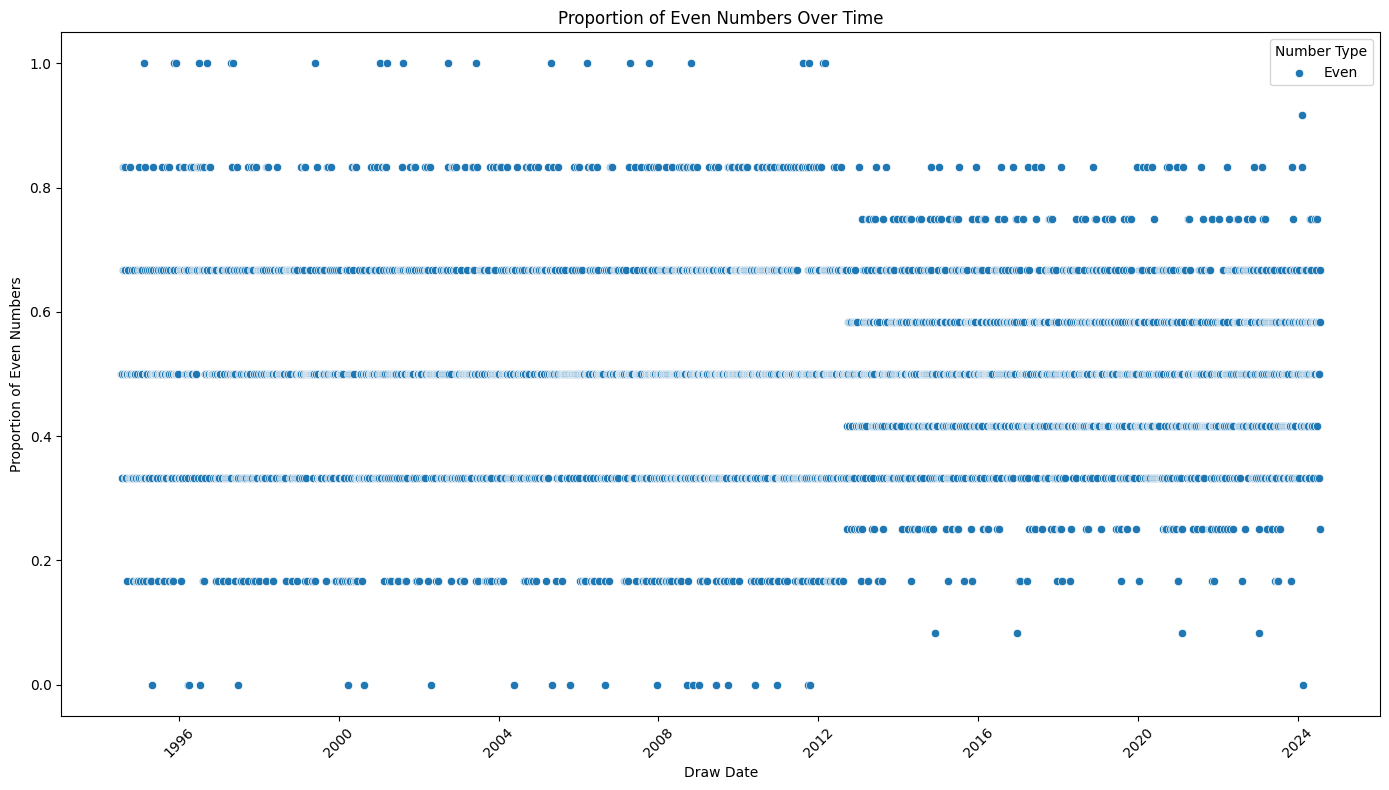

In [23]:
# Plotting the even distribution using seaborn and matplotlib
plt.figure(figsize=(14, 8))
sns.scatterplot(data=even_odd_distribution, x='drawDate', y='EvenProportion', label='Even', marker='o')
plt.title('Proportion of Even Numbers Over Time')
plt.xlabel('Draw Date')
plt.ylabel('Proportion of Even Numbers')
plt.legend(title='Number Type')
plt.xticks(rotation=45)
plt.tight_layout()

# Show even number plot
plt.show()

doing the same for odd numbers is not necessary this information

Probability of getting a majority of High numbers: 0.32
Probability of getting a majority of Low numbers: 0.38


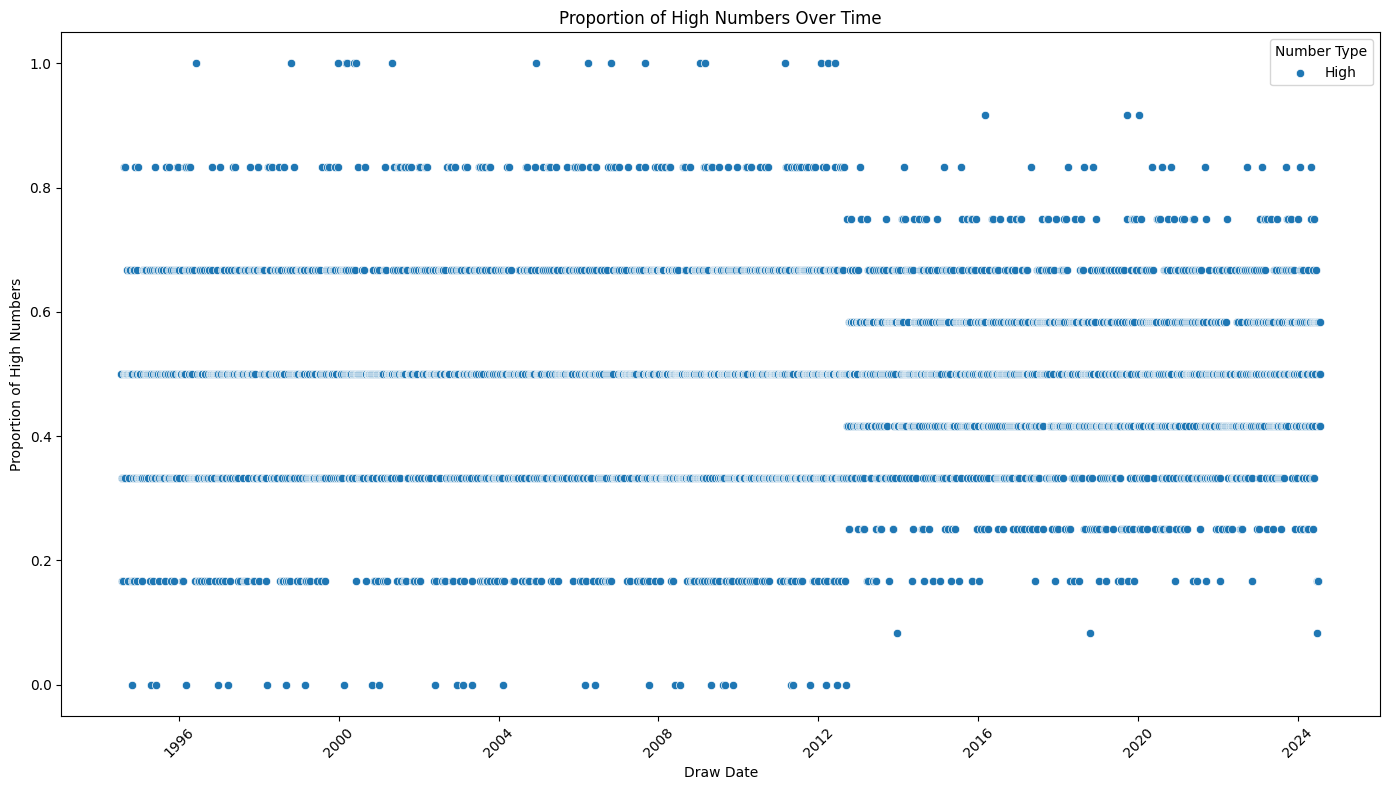

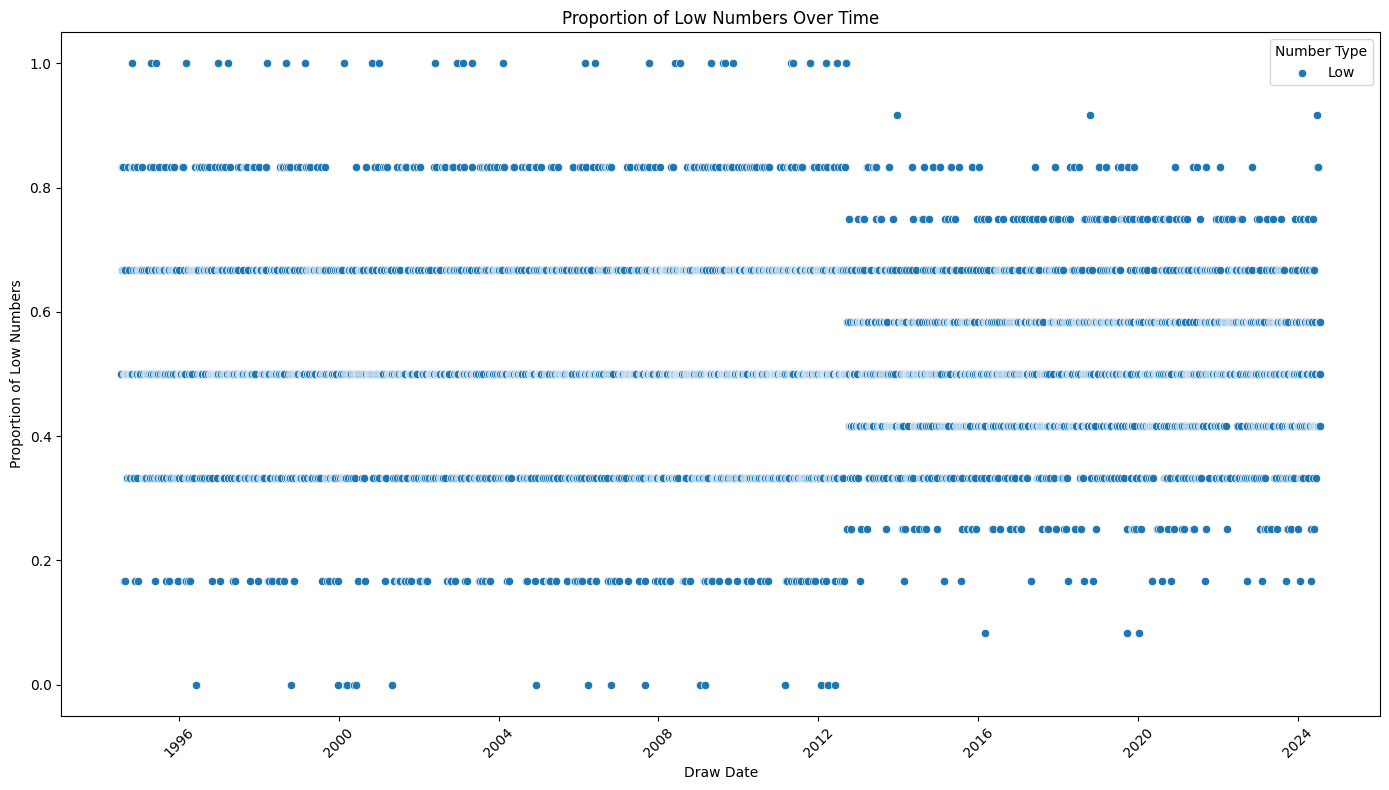

In [24]:
# Expand the resultsJson into a long format DataFrame
expanded_data = lotto.explode('resultsJson').reset_index(drop=True)
expanded_data = expanded_data.rename(columns={'resultsJson': 'Number'})

# Identify each number as high or low
expanded_data['HighLow'] = expanded_data['Number'].apply(lambda x: 'High' if x > 25 else 'Low')

# Calculate the count of high and low numbers for each draw
high_low_distribution = expanded_data.groupby(['drawDate', 'HighLow']).size().unstack(fill_value=0)
high_low_distribution['Total'] = high_low_distribution.sum(axis=1)
high_low_distribution['HighProportion'] = high_low_distribution['High'] / high_low_distribution['Total']
high_low_distribution['LowProportion'] = high_low_distribution['Low'] / high_low_distribution['Total']

# Determine the draws where the majority of numbers come from one of the groups
high_low_distribution['Majority'] = high_low_distribution.apply(lambda row: 'High' if row['High'] > row['Low'] else ('Low' if row['Low'] > row['High'] else 'Tie'), axis=1)

# Calculate the probability of getting a majority from one of the groups
total_draws = len(high_low_distribution)
majority_high = (high_low_distribution['Majority'] == 'High').sum()
majority_low = (high_low_distribution['Majority'] == 'Low').sum()

probability_majority_high = majority_high / total_draws
probability_majority_low = majority_low / total_draws

# Display the results
print(f"Probability of getting a majority of High numbers: {probability_majority_high:.2f}")
print(f"Probability of getting a majority of Low numbers: {probability_majority_low:.2f}")

# Plotting the high/low distribution using seaborn and matplotlib
plt.figure(figsize=(14, 8))
sns.scatterplot(data=high_low_distribution, x=high_low_distribution.index, y='HighProportion', label='High', marker='o')
plt.title('Proportion of High Numbers Over Time')
plt.xlabel('Draw Date')
plt.ylabel('Proportion of High Numbers')
plt.legend(title='Number Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
sns.scatterplot(data=high_low_distribution, x=high_low_distribution.index, y='LowProportion', label='Low', marker='o')
plt.title('Proportion of Low Numbers Over Time')
plt.xlabel('Draw Date')
plt.ylabel('Proportion of Low Numbers')
plt.legend(title='Number Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Consecutive Numbers in Each Draw:
                      drawDate   gameType               resultsJson   
2    2024-07-20 22:00:00+00:00      Lotto    [5, 7, 20, 23, 28, 42]  \
3    2024-07-20 22:00:00+00:00  LottoPlus   [6, 22, 33, 46, 48, 49]   
4    2024-07-18 22:00:00+00:00      Lotto  [14, 16, 18, 23, 34, 40]   
5    2024-07-18 22:00:00+00:00  LottoPlus   [7, 26, 30, 32, 43, 45]   
6    2024-07-16 22:00:00+00:00      Lotto   [7, 13, 17, 20, 35, 43]   
...                        ...        ...                       ...   
6879 1994-08-06 00:00:00+00:00      Lotto  [10, 12, 14, 15, 24, 34]   
6880 1994-08-03 00:00:00+00:00      Lotto    [7, 9, 10, 12, 15, 44]   
6881 1994-07-30 00:00:00+00:00      Lotto    [1, 5, 18, 21, 30, 39]   
6882 1994-07-27 00:00:00+00:00      Lotto      [1, 4, 8, 9, 34, 41]   
6883 1994-07-23 00:00:00+00:00      Lotto   [4, 20, 25, 27, 45, 46]   

     ConsecutiveNumbers  
2                    []  
3            [(48, 49)]  
4                    []  
5        

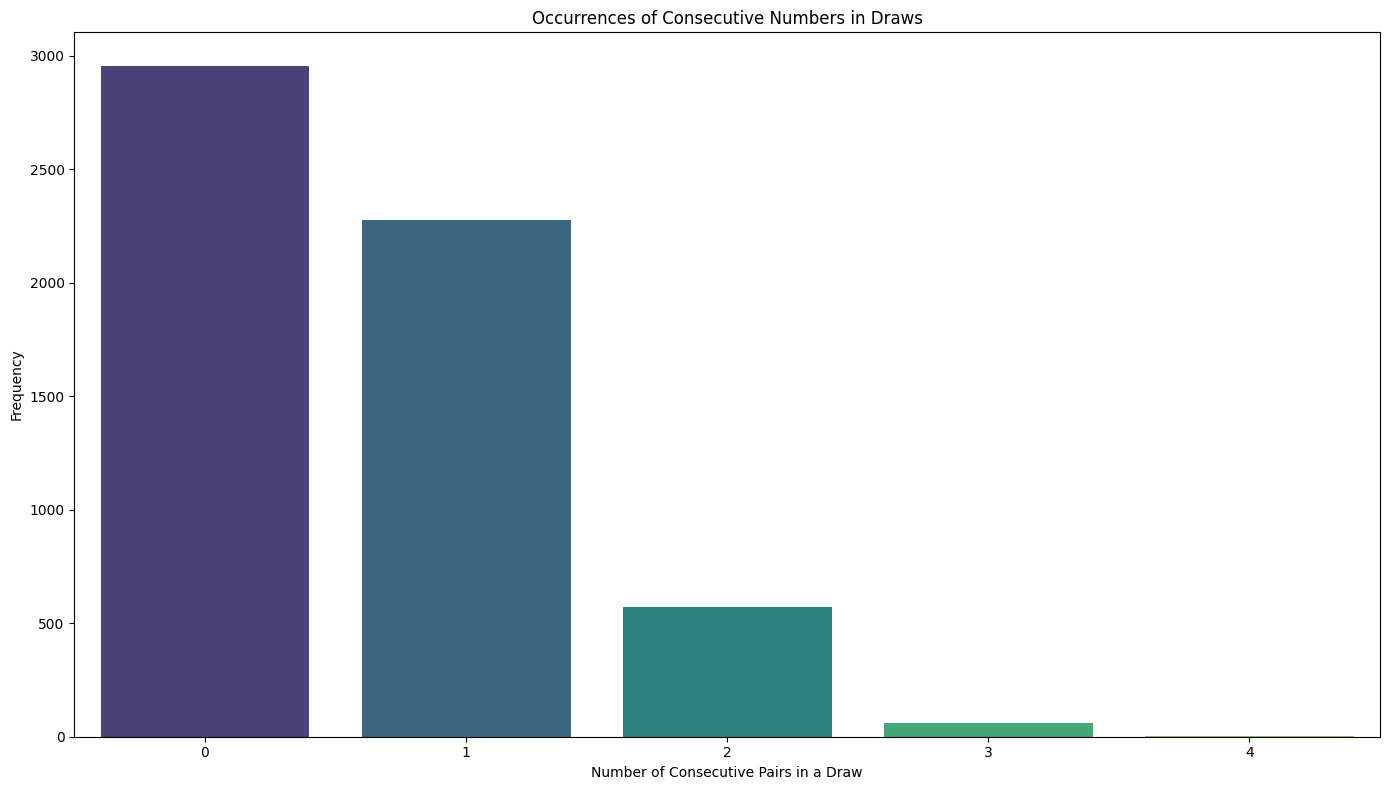

In [25]:
# Function to identify consecutive numbers
def find_consecutive_numbers(numbers):
    numbers.sort()
    consecutive = []
    for i in range(len(numbers) - 1):
        if numbers[i+1] == numbers[i] + 1:
            consecutive.append((numbers[i], numbers[i+1]))
    return consecutive

# Apply the function to each draw and store the results
lotto['ConsecutiveNumbers'] = lotto['resultsJson'].apply(find_consecutive_numbers)

# Count the occurrences of consecutive numbers
consecutive_counts = lotto['ConsecutiveNumbers'].apply(len).value_counts().sort_index()

# Display the results
print("Consecutive Numbers in Each Draw:")
print(lotto[['drawDate', 'gameType', 'resultsJson', 'ConsecutiveNumbers']])
print("\nCount of Consecutive Number Occurrences:")
print(consecutive_counts)

# Plotting the consecutive number occurrences using seaborn and matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.barplot(x=consecutive_counts.index, y=consecutive_counts.values, palette='viridis')
plt.title('Occurrences of Consecutive Numbers in Draws')
plt.xlabel('Number of Consecutive Pairs in a Draw')
plt.ylabel('Frequency')
plt.tight_layout()

# Show plot
plt.show()

Summary Statistics of Sums:
count    5867.000000
mean      149.658940
std        32.588055
min        35.000000
25%       127.000000
50%       149.000000
75%       172.000000
max       265.000000
Name: Sum, dtype: float64


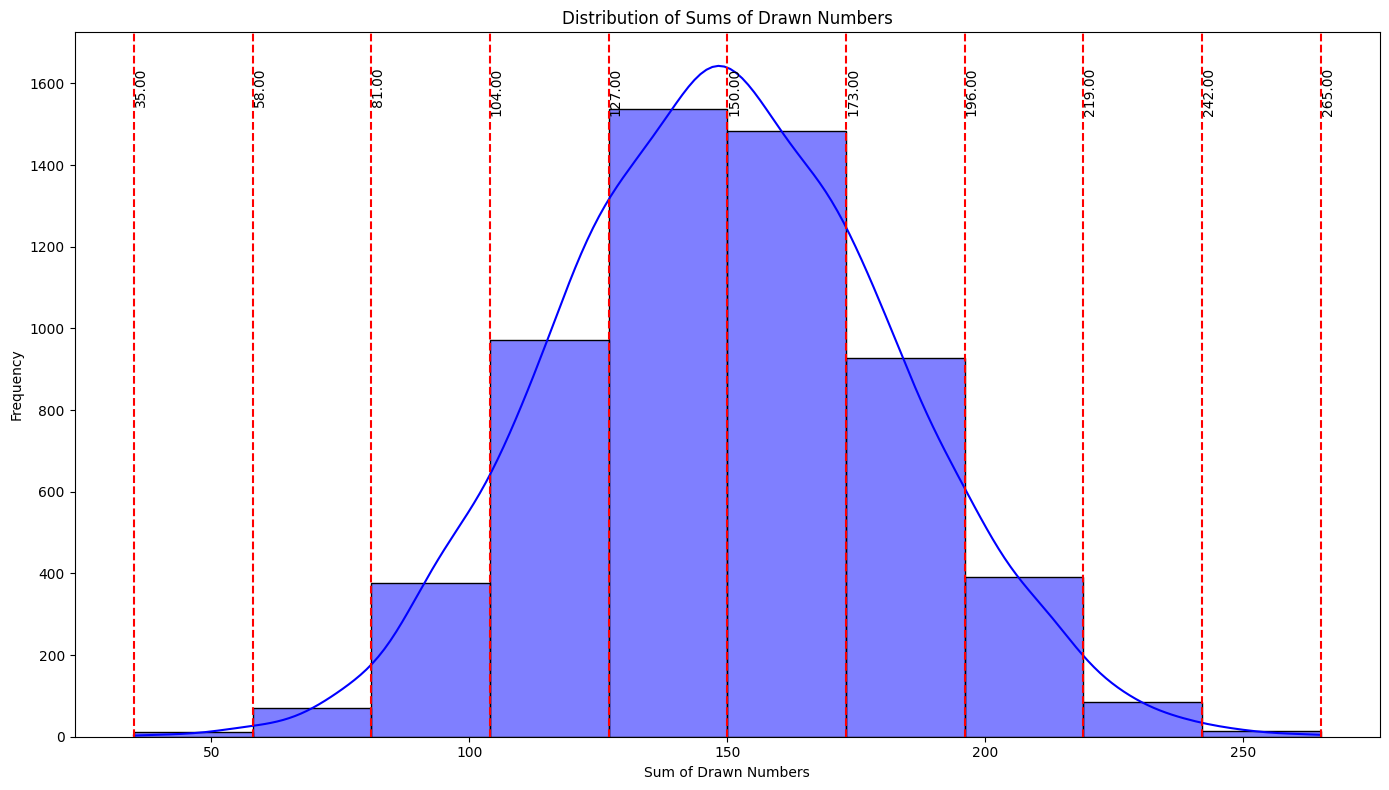

In [26]:
# Calculate the sum of drawn numbers for each draw
lotto['Sum'] = lotto['resultsJson'].apply(sum)

# Analyze the distribution of these sums
sum_stats = lotto['Sum'].describe()
print("Summary Statistics of Sums:")
print(sum_stats)
hist, bin_edges = np.histogram(lotto['Sum'], bins=10)
# Plotting the distribution of sums using seaborn and matplotlib
plt.figure(figsize=(14, 8))
sns.histplot(lotto['Sum'], bins=10, kde=True, color='blue')
plt.title('Distribution of Sums of Drawn Numbers')
plt.xlabel('Sum of Drawn Numbers')
plt.ylabel('Frequency')
plt.tight_layout()

# Annotate the plot with the bin edges
for edge in bin_edges:
    plt.axvline(edge, color='red', linestyle='--')
    plt.text(edge, plt.ylim()[1] * 0.95, f'{edge:.2f}', rotation=90, verticalalignment='top')

# Show plot
plt.show()

This gives us pretty cool results.
We can observe now that most of the draws sum of numbers is between 127 and 173.

Chi-Square Statistic: 22.838075517341913
P-Value: 0.9992306857265472


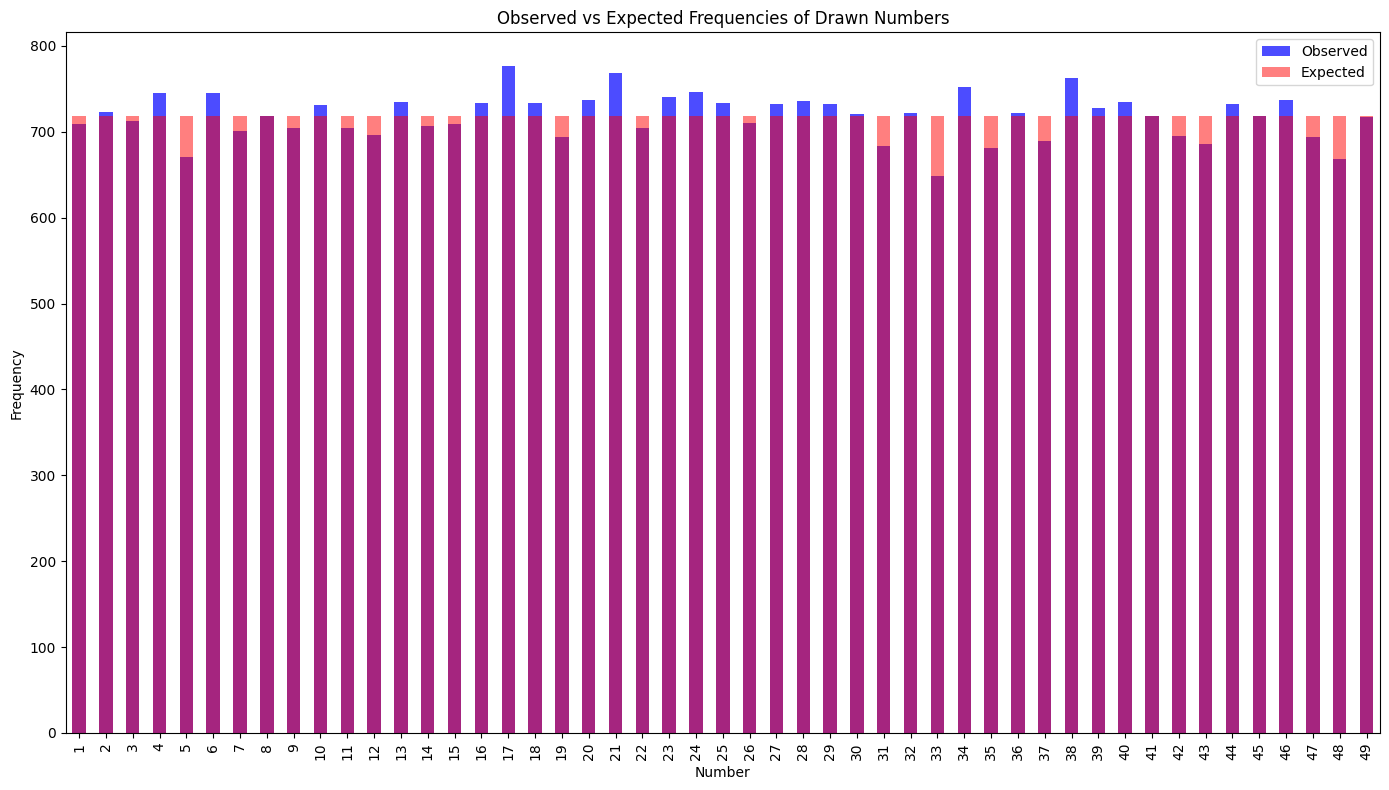

In [27]:
# Flatten the resultsJson into a single list of numbers
all_numbers = [num for sublist in lotto['resultsJson'] for num in sublist]

# Calculate the observed frequencies
observed_frequencies = pd.Series(all_numbers).value_counts().sort_index()
# Calculate the expected frequencies assuming a uniform distribution
total_numbers_drawn = sum(len(results) for results in lotto['resultsJson'])  # Total number of numbers drawn
unique_numbers = observed_frequencies.index
expected_frequency = total_numbers_drawn / len(unique_numbers)
expected_frequencies = pd.Series([expected_frequency] * len(unique_numbers), index=unique_numbers)

# Perform Chi-Square Test
chi2, p_value = chi2_contingency([observed_frequencies, expected_frequencies])[:2]

print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p_value}")

# Plotting the observed and expected frequencies
plt.figure(figsize=(14, 8))
observed_frequencies.plot(kind='bar', color='blue', alpha=0.7, label='Observed')
expected_frequencies.plot(kind='bar', color='red', alpha=0.5, label='Expected')
plt.title('Observed vs Expected Frequencies of Drawn Numbers')
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

now correlation

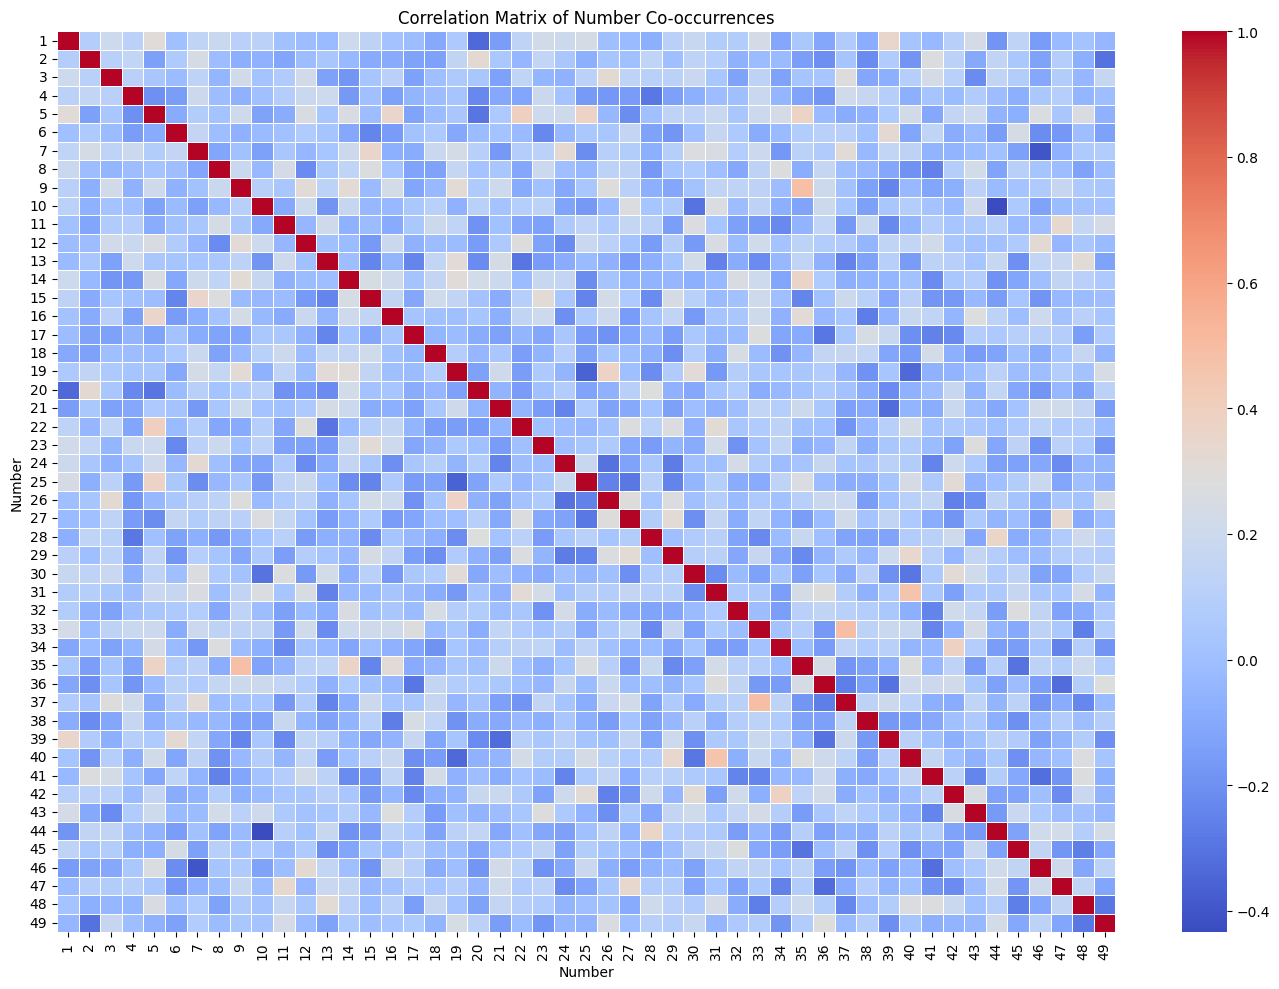

In [34]:
draws = lotto['resultsJson'].tolist()

# Create a list of all unique numbers
all_numbers = sorted(set(num for draw in draws for num in draw))

# Create a co-occurrence matrix
co_occurrence_matrix = pd.DataFrame(0, index=all_numbers, columns=all_numbers)

for draw in draws:
    for num1, num2 in itertools.combinations(draw, 2):
        co_occurrence_matrix.loc[num1, num2] += 1
        co_occurrence_matrix.loc[num2, num1] += 1

# Calculate the correlation matrix, filling NaN with 0
correlation_matrix = co_occurrence_matrix.corr().fillna(0)

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Number Co-occurrences')
plt.xlabel('Number')
plt.ylabel('Number')
plt.tight_layout()

# Show plot
plt.show()

In [35]:
# Print the 32 most correlated number pairs
correlation_pairs = correlation_matrix.unstack().sort_values(kind="quicksort", ascending=False)
correlation_pairs = correlation_pairs[correlation_pairs < 1]  # Remove self-correlation
top_32_pairs = correlation_pairs.drop_duplicates().head(32)
print(top_32_pairs)

33  37    0.495095
9   35    0.481364
31  40    0.467190
22  5     0.400747
42  34    0.386296
19  26    0.377807
5   25    0.376535
    35    0.367551
14  35    0.363183
28  44    0.358411
15  7     0.355335
16  5     0.350407
39  1     0.346538
40  29    0.343089
47  27    0.338757
    11    0.338176
2   20    0.327251
6   39    0.326835
7   24    0.322820
12  46    0.321780
3   26    0.320296
23  15    0.316168
42  30    0.315932
31  22    0.315871
19  9     0.315821
14  9     0.314679
48  13    0.314277
29  27    0.313694
42  25    0.310519
19  30    0.308649
35  16    0.308157
37  7     0.307291
dtype: float64


FIND SET

In [50]:
def check_combination(draws, combination):
    from itertools import combinations

    # Convert the draws to sets for easier comparison
    draw_sets = [set(draw) for draw in draws]
    combination_set = set(combination)

    # Check if the exact combination is in the draws
    if combination_set in draw_sets:
        return "The exact combination occurs in the draws."

    # Find combinations where only one number is different
    close_matches = []
    for draw_set in draw_sets:
        # If the difference between the draw set and the combination set is 1
        if len(combination_set - draw_set) == 1:
            close_matches.append(sorted(draw_set))
    
    if close_matches:
        return f"Combinations with only one number different: {close_matches}"

    return "There are none of such kinds."

# Example combination to check
combination = [2, 7, 20, 25, 37, 42]

# Check the combination
result = check_combination(draws, combination)
print(result)


There are none of such kinds.


PREDICTIVE ANALYSIS

In [ ]:
# Create a list of all unique numbers
from sklearn.preprocessing import MultiLabelBinarizer

# lotto = lotto.drop(columns=['ConsecutiveNumbers', 'Sum'])

# Create a list of all unique numbers
all_numbers = sorted(set(num for draw in lotto['resultsJson'] for num in draw))

print(all_numbers)
print(lotto["resultsJson"].info())
# Create a binary matrix indicating the presence of each number in each draw
binary_matrix = pd.DataFrame(0, index=lotto.index, columns=all_numbers)
print("FIRST")
print(binary_matrix.info())

for idx, draw in enumerate(lotto['resultsJson']):
    for num in draw:
        binary_matrix.loc[idx, num] = 1

print("SECOND")
print(binary_matrix.info())
# Create features (X) and labels (y) using MultiLabelBinarizer
mlb = MultiLabelBinarizer(classes=all_numbers)

print("mlb classes:", mlb.classes_)

y = mlb.fit_transform(lotto['resultsJson'])

# print("mlb classes:", y.classes_)

# Debug prints
print("Length of binary_matrix (X):", len(binary_matrix))
print("Shape of binary_matrix (X):", binary_matrix.shape)
print("Length of y:", len(y))
print("Shape of y:", y.shape)

# # Ensure X and y have the same number of samples
# assert binary_matrix.shape[0] == y.shape[0], "Mismatch in number of samples between features and labels"

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(binary_matrix, y, test_size=0.3, random_state=36)

# Train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
class_report = classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1), target_names=[str(num) for num in all_numbers])

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Predict future draws (example)
future_draw_predictions = model.predict(X_test)
predicted_draws = [all_numbers[idx] for idx, val in enumerate(future_draw_predictions[0]) if val == 1]

print(f"Predicted Draws: {predicted_draws}")

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
<class 'pandas.core.series.Series'>
Index: 5867 entries, 2 to 6883
Series name: resultsJson
Non-Null Count  Dtype 
--------------  ----- 
5867 non-null   object
dtypes: object(1)
memory usage: 220.7+ KB
None
FIRST
<class 'pandas.core.frame.DataFrame'>
Index: 5867 entries, 2 to 6883
Data columns (total 49 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       5867 non-null   int64
 1   2       5867 non-null   int64
 2   3       5867 non-null   int64
 3   4       5867 non-null   int64
 4   5       5867 non-null   int64
 5   6       5867 non-null   int64
 6   7       5867 non-null   int64
 7   8       5867 non-null   int64
 8   9       5867 non-null   int64
 9   10      5867 non-null   int64
 10  11      5867 non-null   int64
 11  12      5867 non-null   int64
 12  1

AttributeError: 'MultiLabelBinarizer' object has no attribute 'classes_'